In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
def show_curve(x, y, F, critical, title):
        plt.figure(figsize = (10, 8)) #adjust if you need to
        plt.plot(x, y, color = 'blue', label = 'F Distribution')
        plt.axvline(x = F, color = 'green', linestyle = '--', label = 'F Statistic')
        plt.fill_between(x, y, color = 'red', where = (x > critical), alpha = 0.5, label = 'Critical Region')
        plt.xlabel('F Score')
        plt.ylabel('Probability Density')
        plt.title(title)
        plt.legend()
        plt.show()
def Two_Way_ANOVA(groups, row_groups, col_groups, alpha):
    cell_mean = [np.mean(group) for group in groups]
    col_mean = [np.mean(col) for col in col_groups]
    row_mean = [np.mean(row) for row in row_groups]
    grand_mean = np.mean(cell_mean)
    
    k = len(groups)
    N = sum([len(group) for group in groups])
    c = len(col_groups)
    r = len(row_groups)
    SSB = sum( len(group) * (cell_mean[i] - grand_mean)**2 \
                for i, group in enumerate(groups) )
    SSW = sum( (x - cell_mean[i])**2 \
                for i, group in enumerate(groups) for x in group )
    SSC = sum( len(col) * (col_mean[i] - grand_mean)**2 \
                for i, col in enumerate(col_groups) )
    SSR = sum( len(row) * (row_mean[i] - grand_mean)**2 \
                for i, row in enumerate(row_groups) )
    SSI = SSB - (SSC + SSR)
    dfb = k - 1
    dfc = c - 1
    dfr = r - 1
    dfi = dfc*dfr
    dfw = N - c*r
    MSC = SSC/dfc
    MSR = SSR/dfr
    MSI = SSI/dfi
    MSW = SSW/dfw

    F_col = MSC/MSW
    F_row = MSR/MSW
    F_intr = MSI/MSW 
    critical_col = stats.f.ppf(1-alpha, dfc, dfw)
    critical_row = stats.f.ppf(1-alpha, dfr, dfw)
    critical_intr = stats.f.ppf(1-alpha, dfi, dfw)

    print("Critical Vaue =", critical_col, "\tF Column =", F_col)
    print("Critical Vaue =", critical_row, "\tF Row =", F_row)
    print("Critical Vaue =", critical_intr, "\tF Interaction =", F_intr)
    if F_col > critical_col or F_row > critical_row | F_intr > critical_intr: 
        print("Reject Null Hypothesis")
    else:
        print("Accept Null Hypothesis")

    x = np.linspace(0, 6, 1000)
    y_col = stats.f.pdf(x, dfc, dfw)
    y_row = stats.f.pdf(x, dfr, dfw)
    y_intr = stats.f.pdf(x, dfi, dfw)
    show_curve(x, y_col, F_col, critical_col, "F Column")
    show_curve(x, y_row, F_row, critical_row, "F Row")
    show_curve(x, y_intr, F_intr, critical_intr, "F Interaction")

In [3]:
df = pd.read_csv('reaction_time.csv')
df

,Degree of Danger,Zero,Two,Four
0,Dangerous,8,8,10
1,Dangerous,8,6,8
2,Nondangerous,9,15,24
3,Nondangerous,11,19,18


Critical Vaue = 5.143252849784718 	F Column = 6.75
Critical Vaue = 5.987377607273699 	F Row = 36.0
Critical Vaue = 5.143252849784718 	F Interaction = 5.25
Reject Null Hypothesis


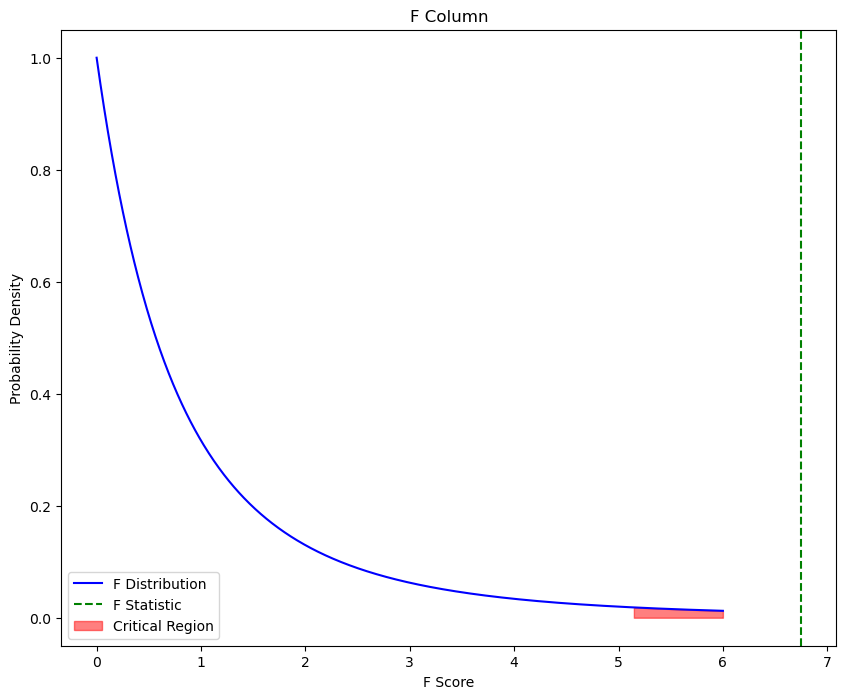

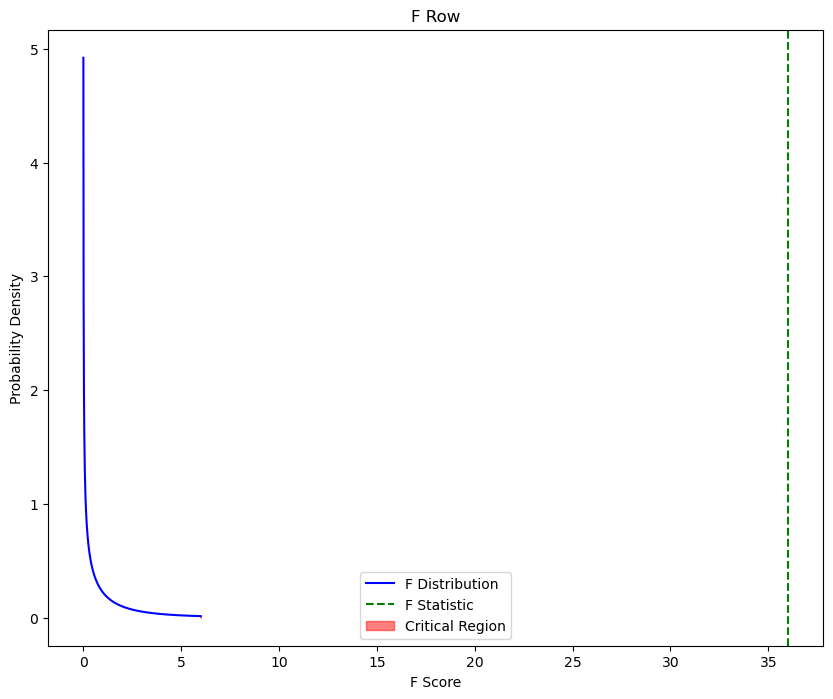

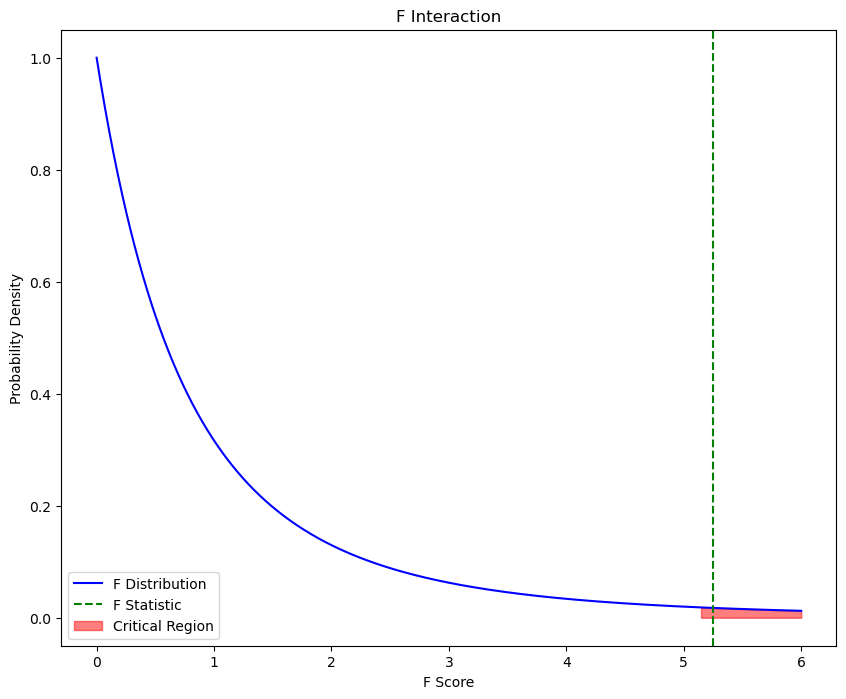

In [4]:
df1 = df[df['Degree of Danger'] == 'Dangerous']
df2 = df[df['Degree of Danger'] == 'Nondangerous']

groups = [df1['Zero'], df1['Two'], df1['Four'], df2['Zero'], df2['Two'], df2['Four']]
row_groups = []
for _, cell in df.groupby(['Degree of Danger']):
    row_groups.append([*cell['Zero'].values , *cell['Two'].values, *cell['Four'].values])
col_groups = [df['Zero'], df['Two'], df['Four']]
alpha = 0.05
Two_Way_ANOVA(groups,row_groups, col_groups, alpha)